0.1


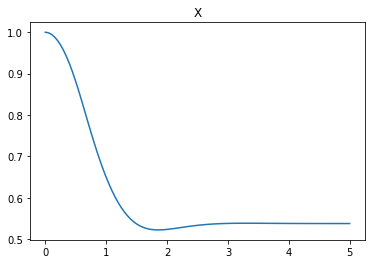

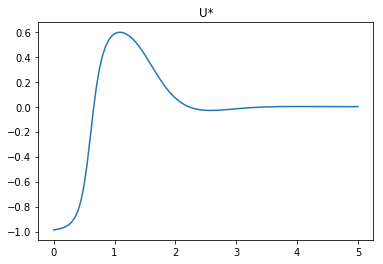

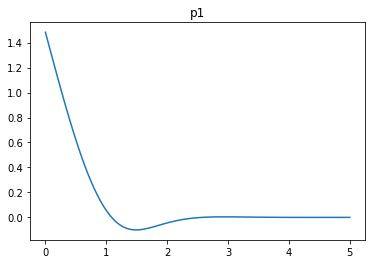

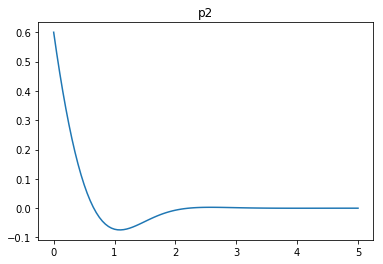

0.08697490026177834


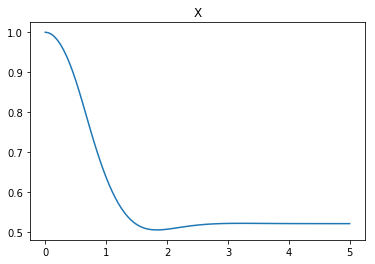

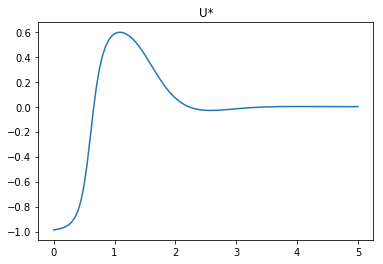

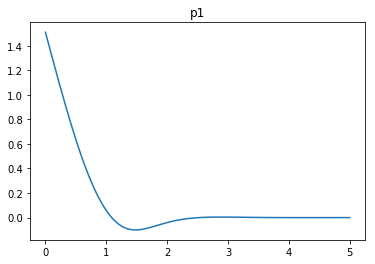

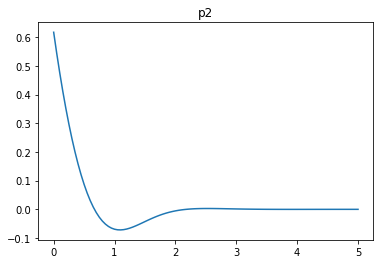

0.07564633275546291


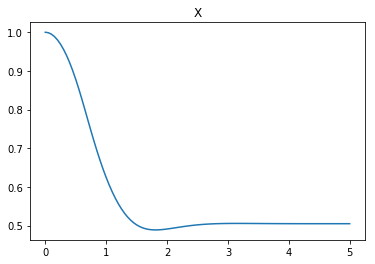

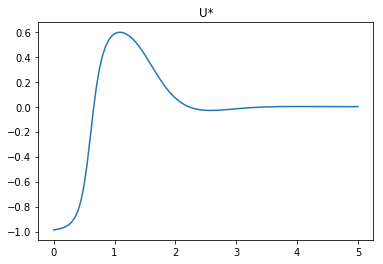

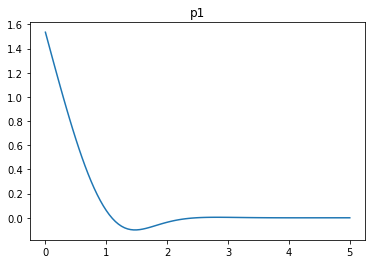

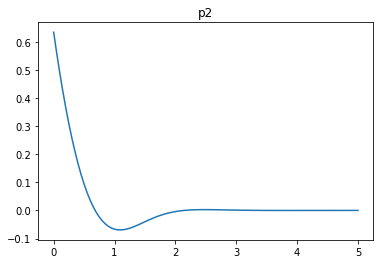

0.0657933224657568


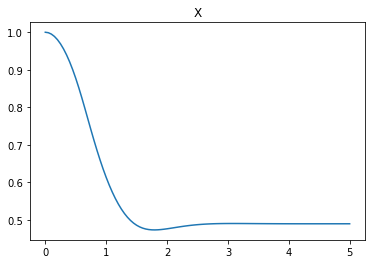

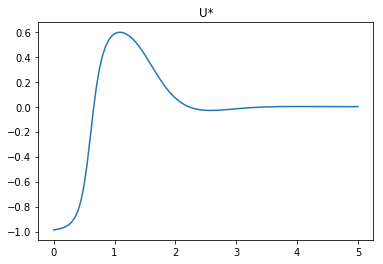

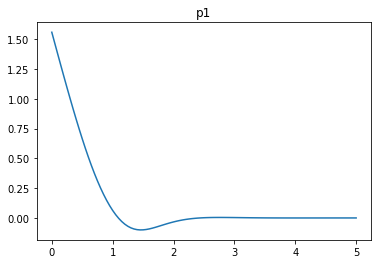

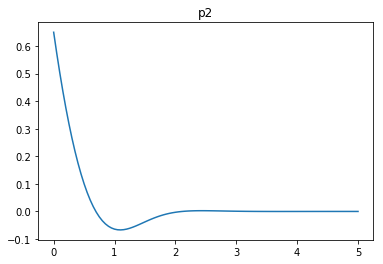

0.05722367659350217


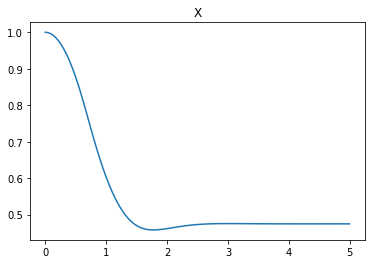

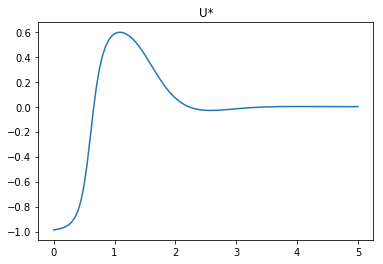

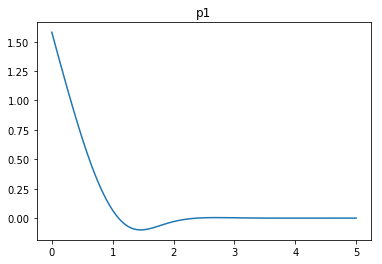

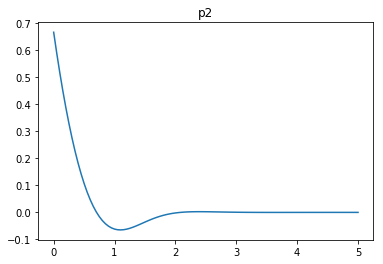

0.049770235643321115


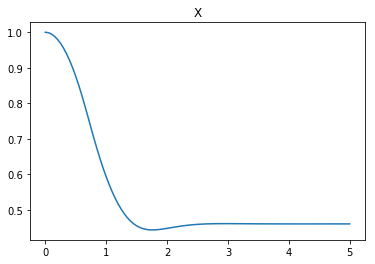

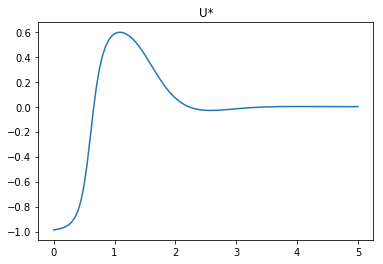

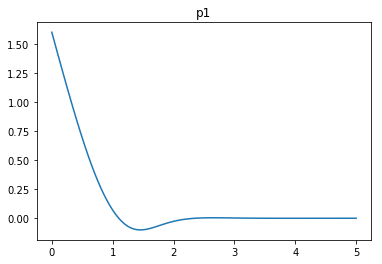

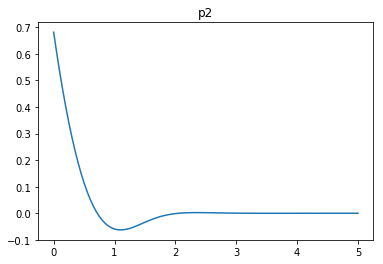

0.04328761281083057


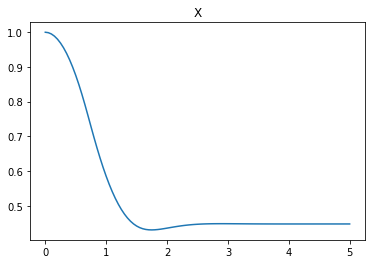

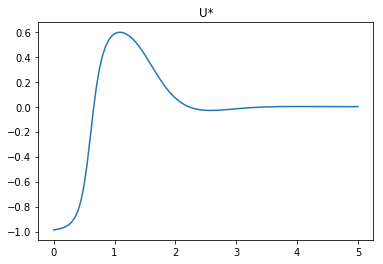

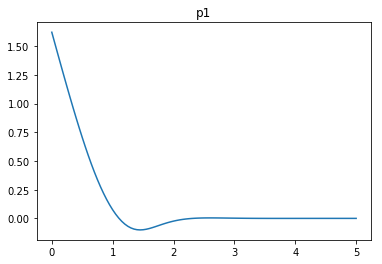

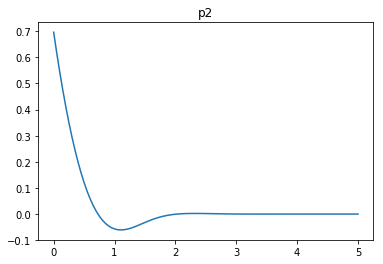

0.037649358067924674


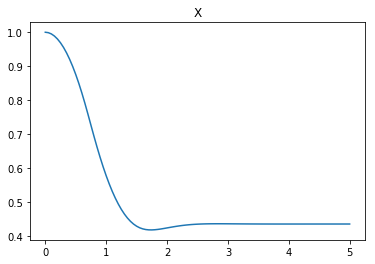

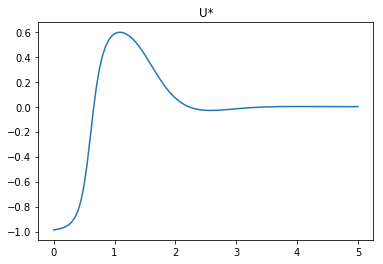

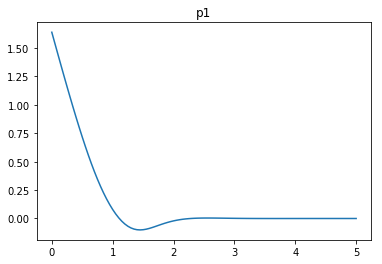

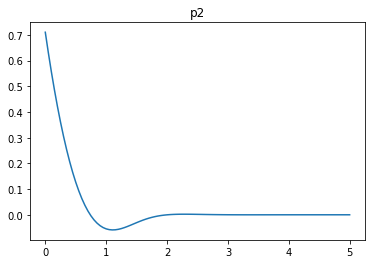

0.03274549162877728


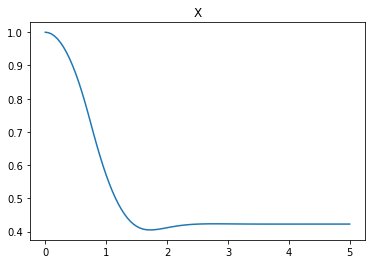

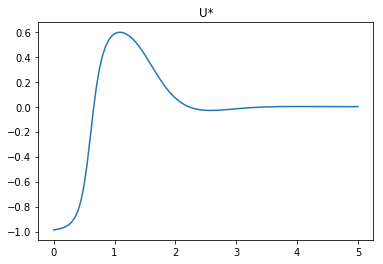

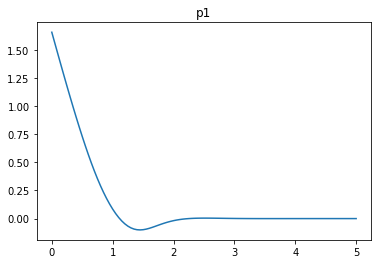

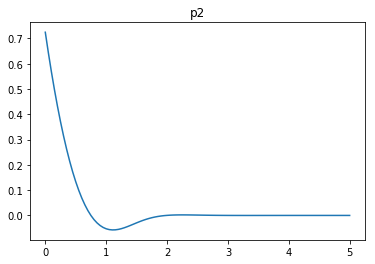

0.02848035868435802


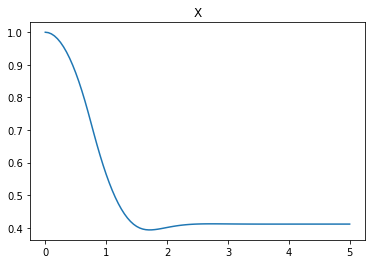

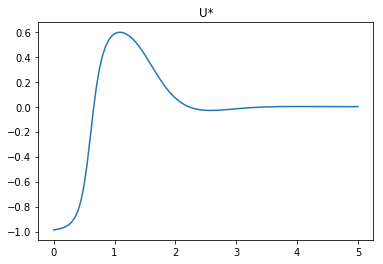

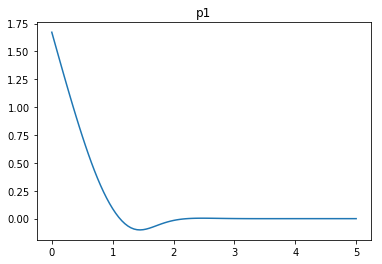

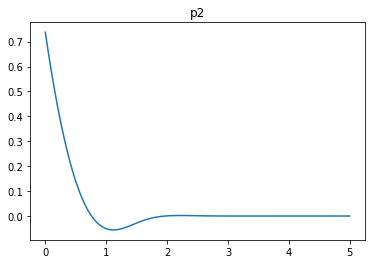

0.024770763559917114


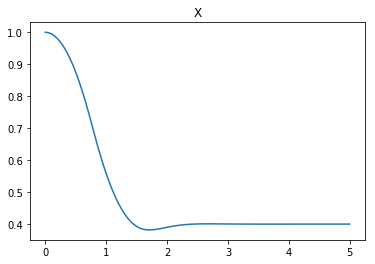

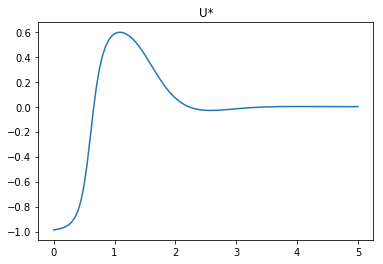

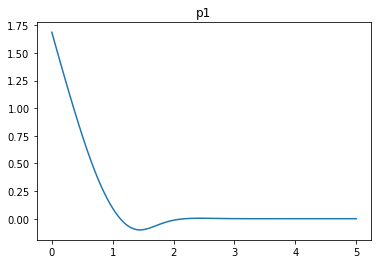

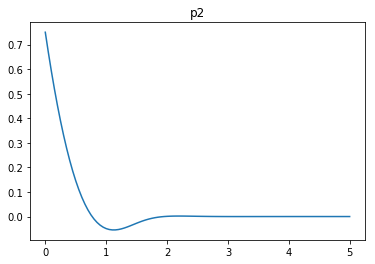

0.021544346900318832


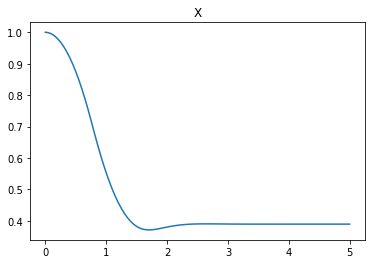

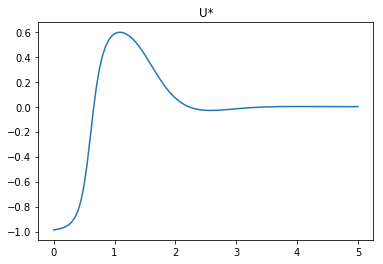

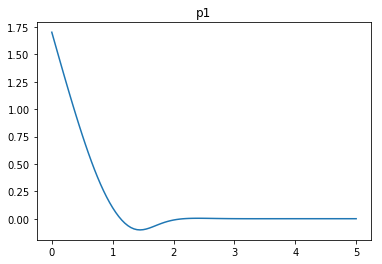

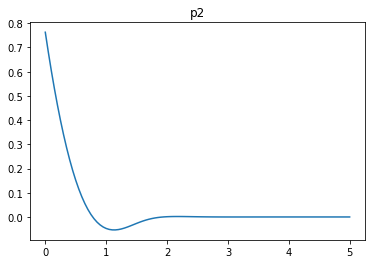

0.01873817422860384


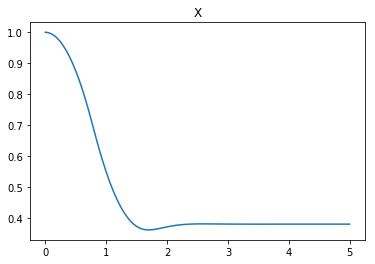

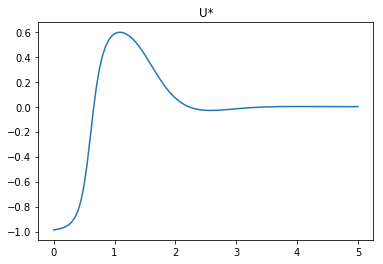

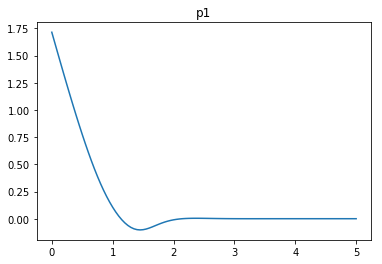

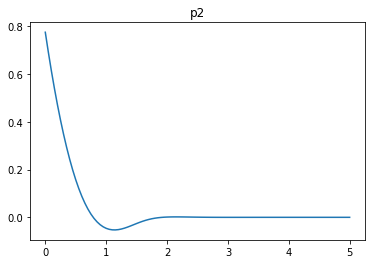

0.016297508346206444


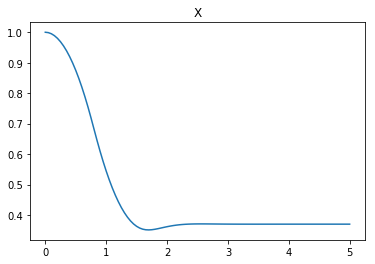

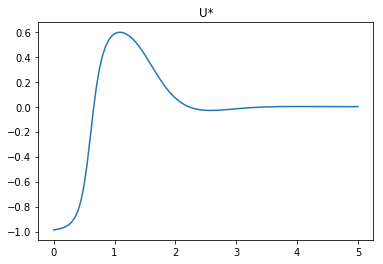

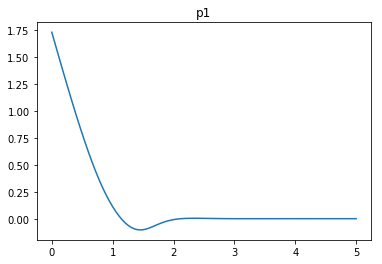

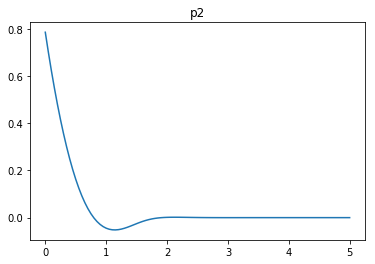

0.014174741629268049


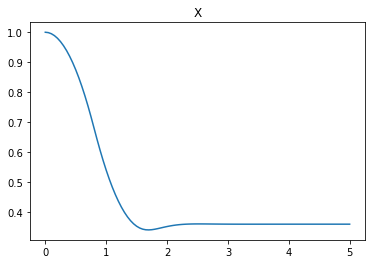

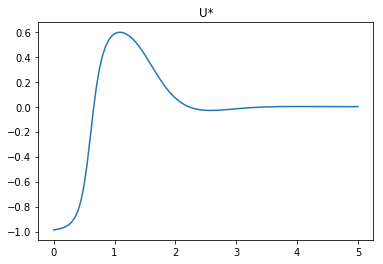

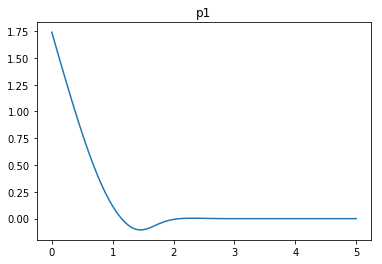

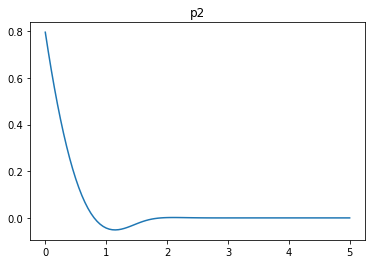

0.012328467394420659


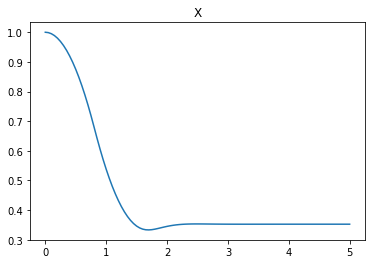

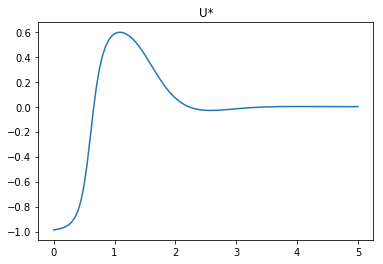

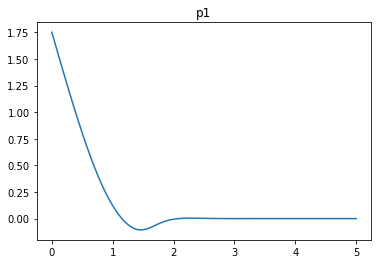

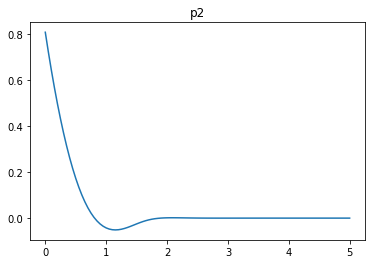

0.010722672220103232


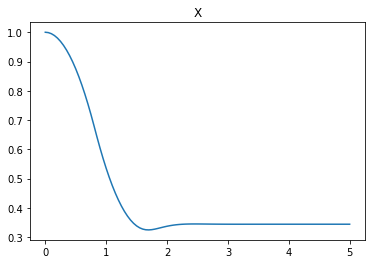

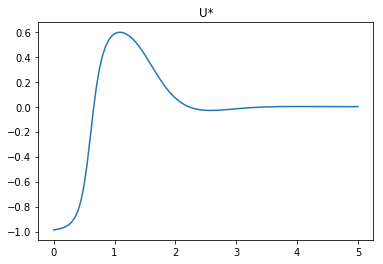

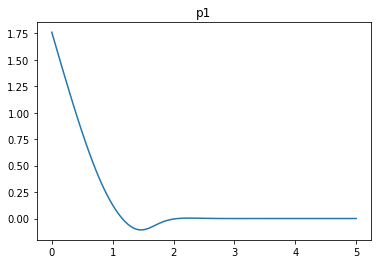

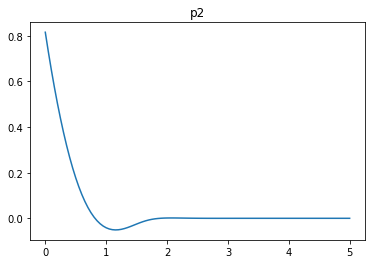

0.0093260334688322


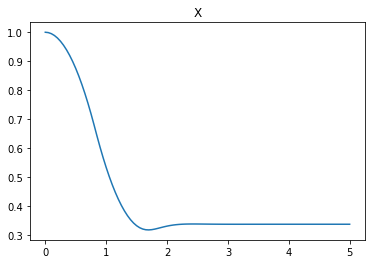

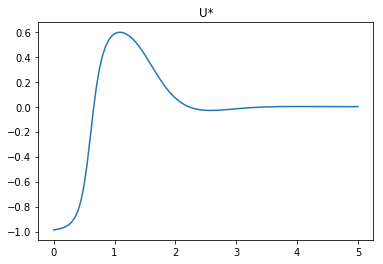

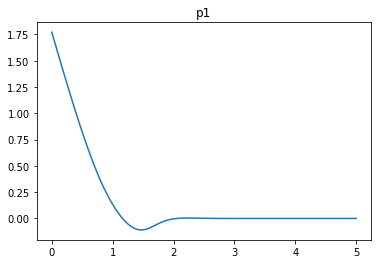

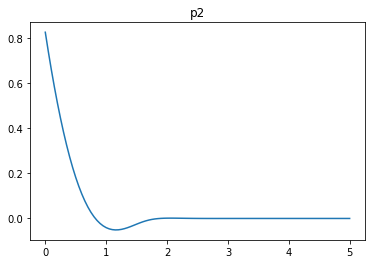

0.008111308307896872


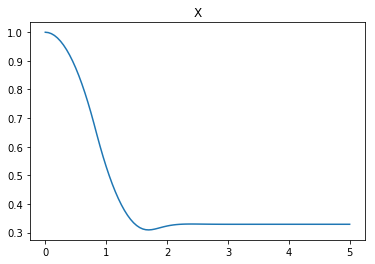

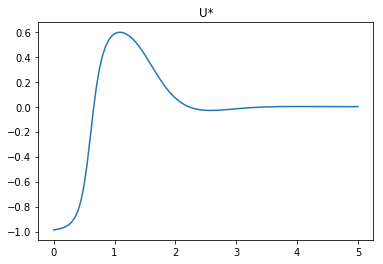

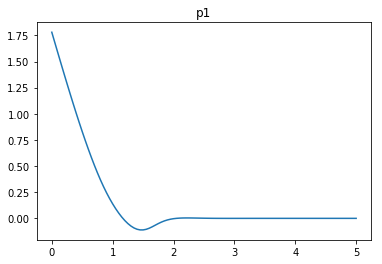

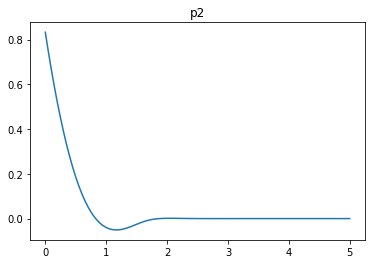

0.007054802310718645


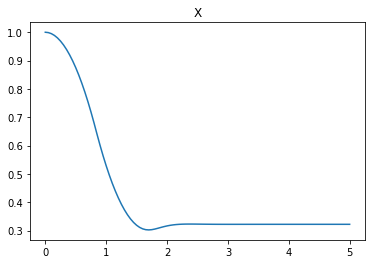

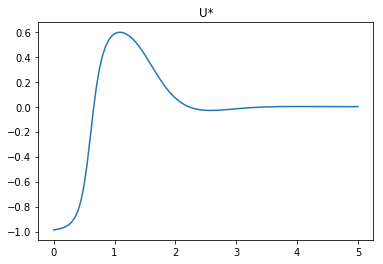

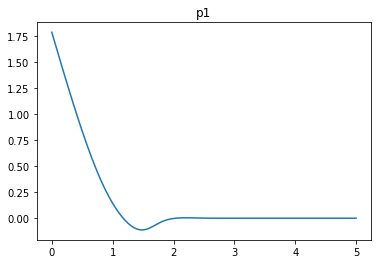

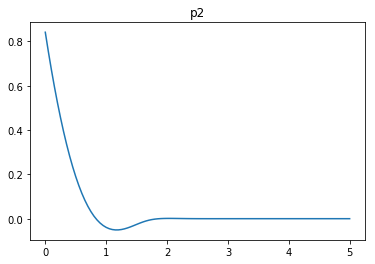

0.006135907273413176


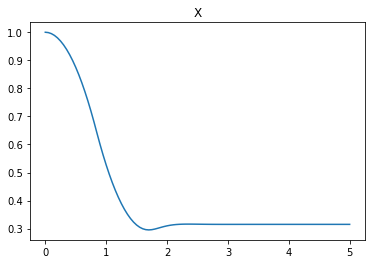

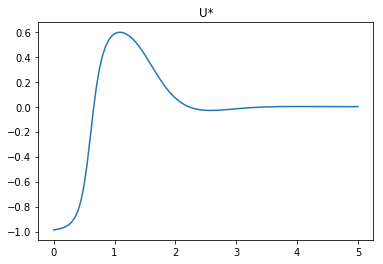

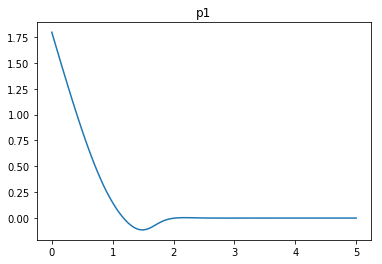

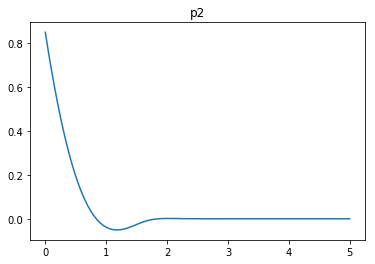

0.005336699231206312


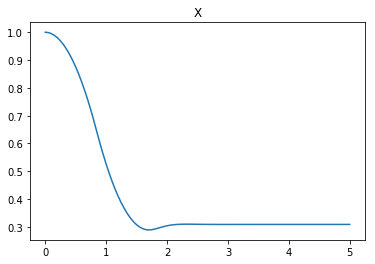

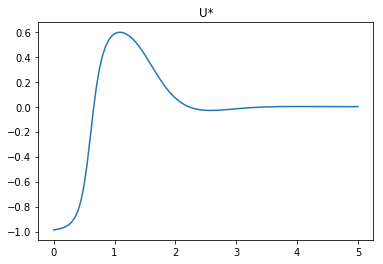

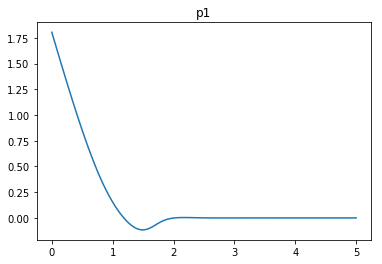

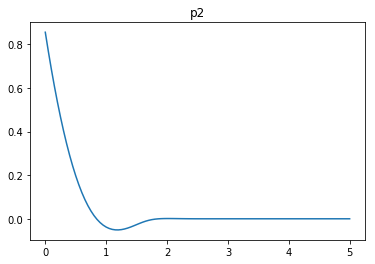

0.004641588833612777


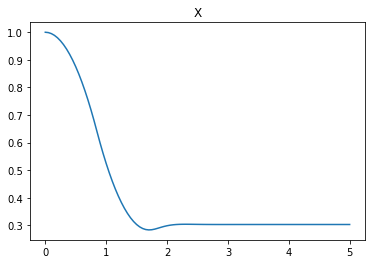

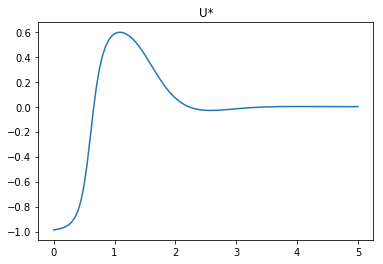

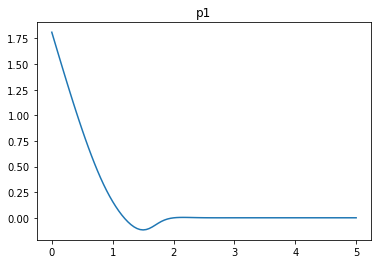

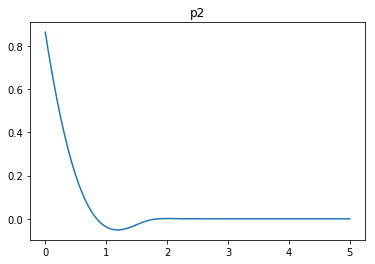

0.004037017258596553


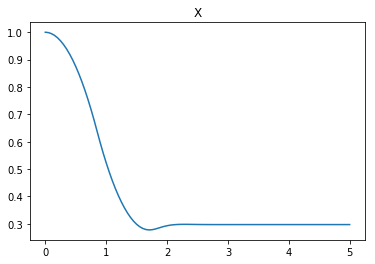

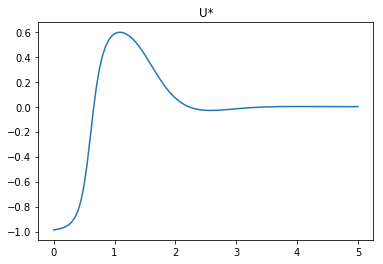

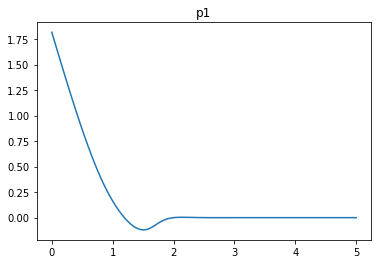

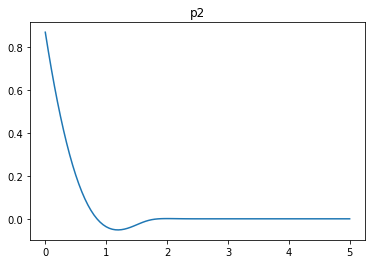

0.003511191734215131


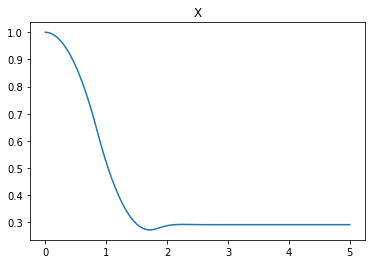

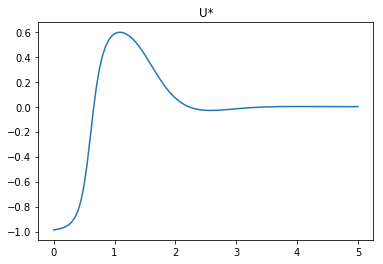

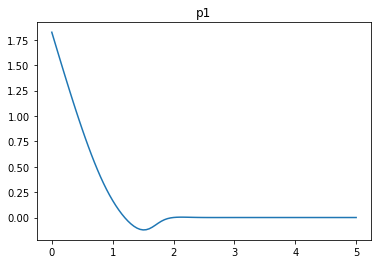

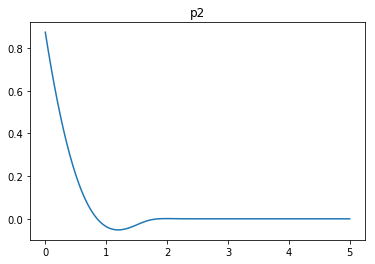

0.0030538555088334154


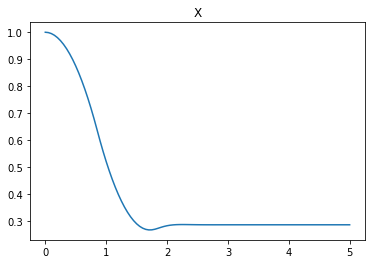

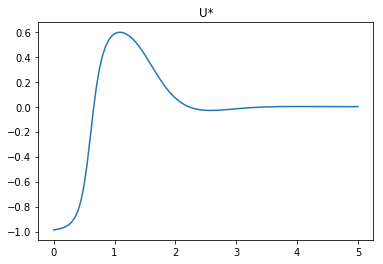

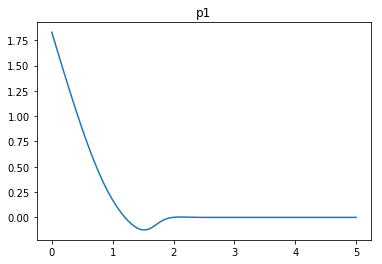

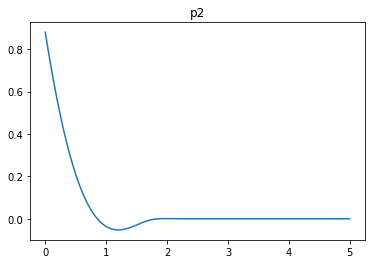

0.0026560877829466868


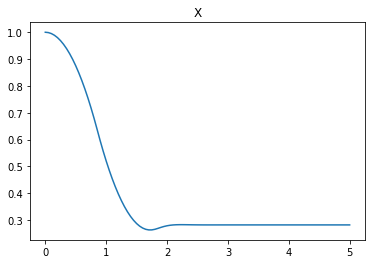

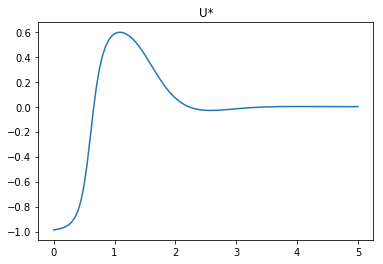

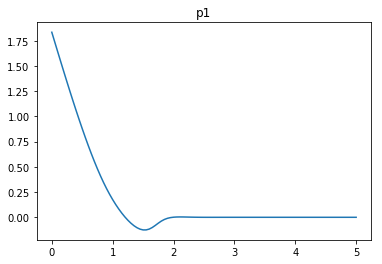

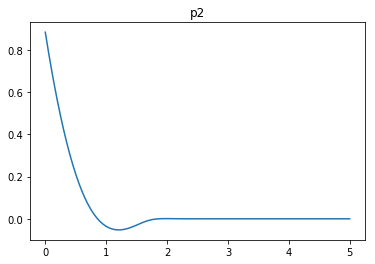

0.002310129700083158


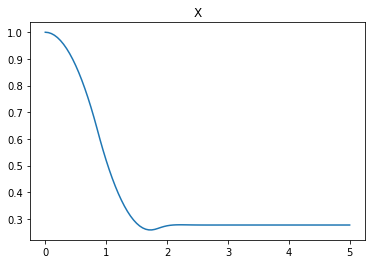

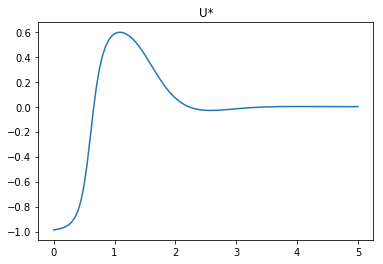

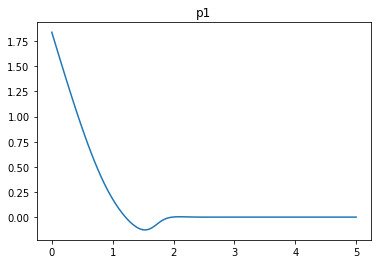

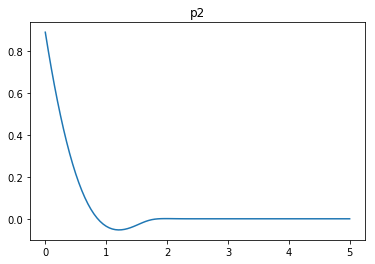

0.002009233002565046


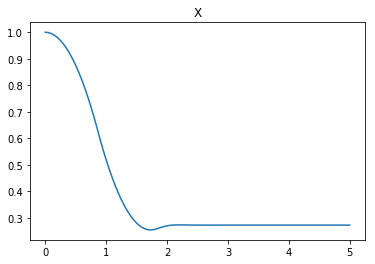

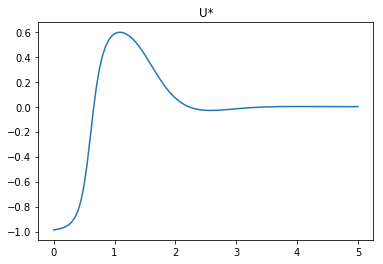

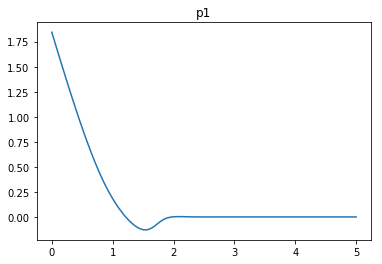

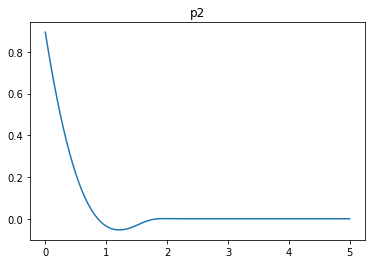

0.001747528400007683


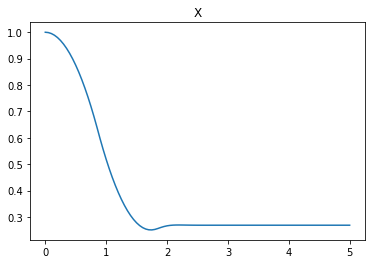

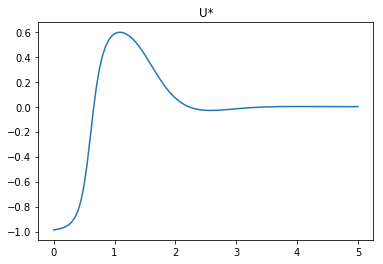

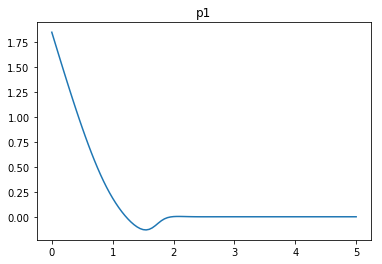

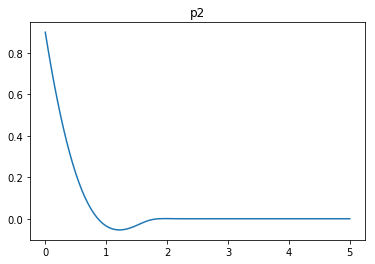

0.0015199110829529332


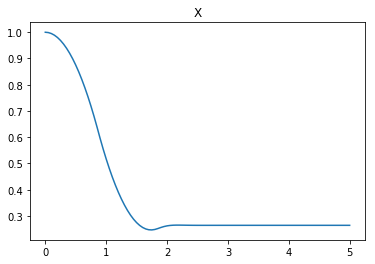

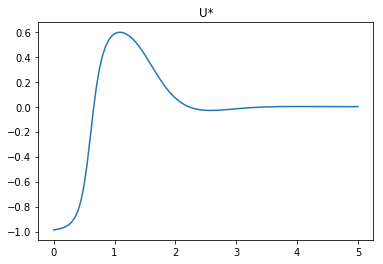

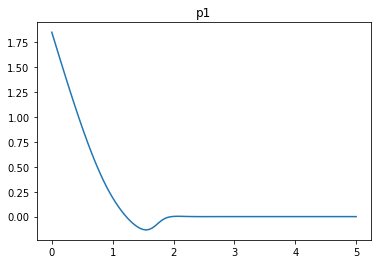

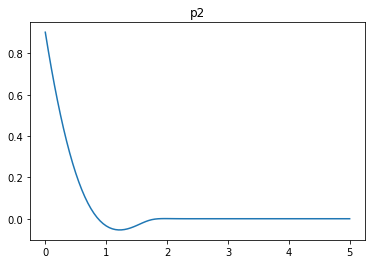

0.0013219411484660286


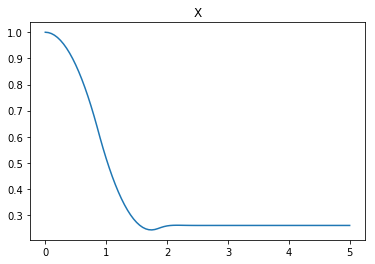

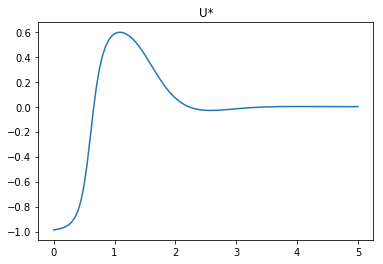

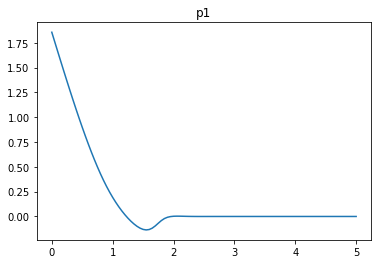

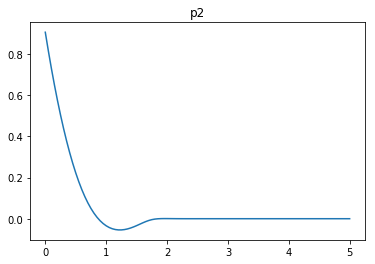

0.0011497569953977356


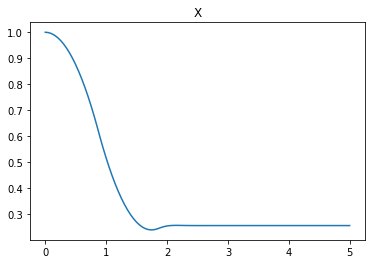

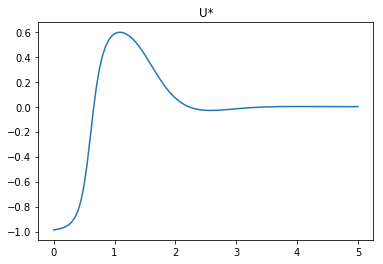

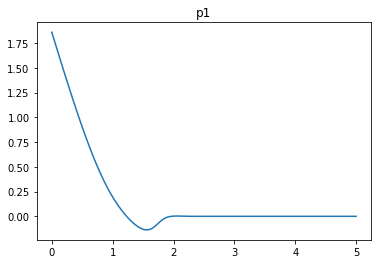

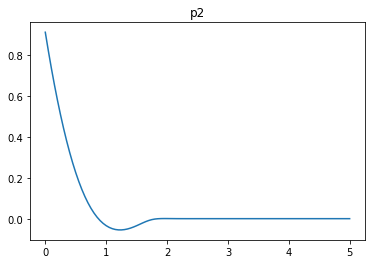

0.001


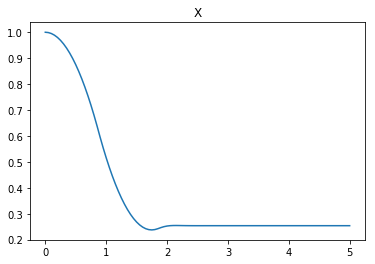

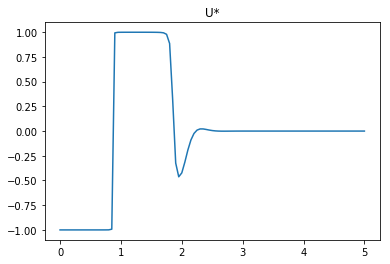

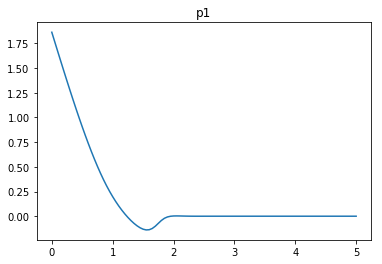

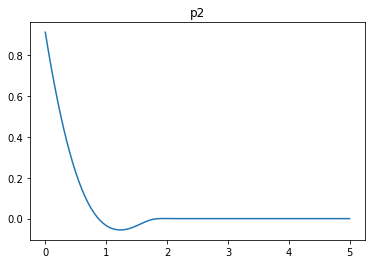

0.0008697490026177834


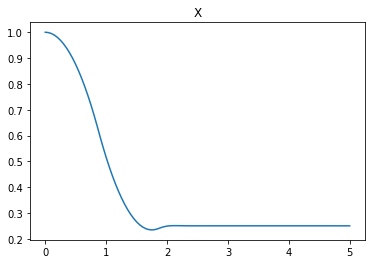

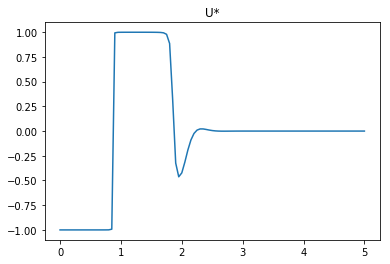

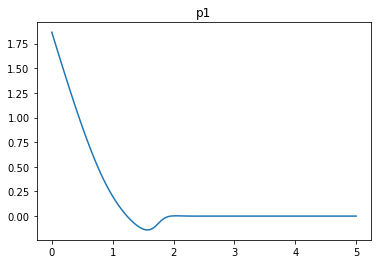

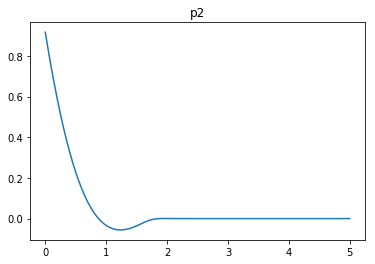

0.000756463327554629


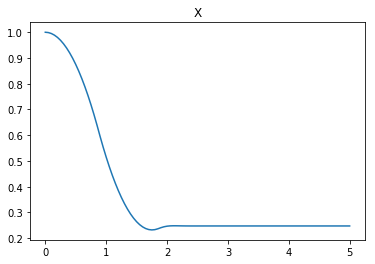

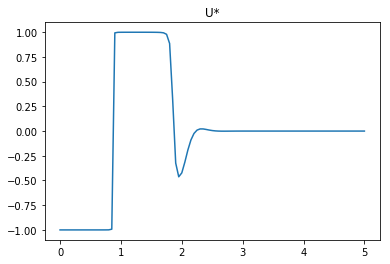

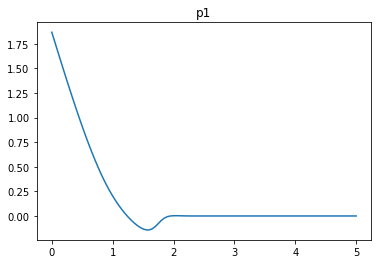

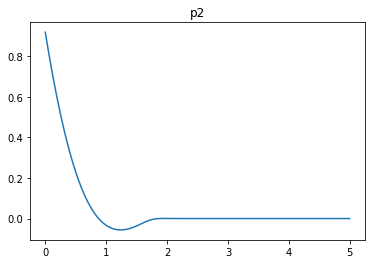

0.0006579332246575682


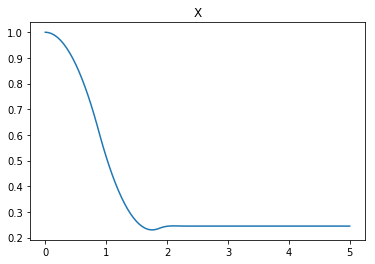

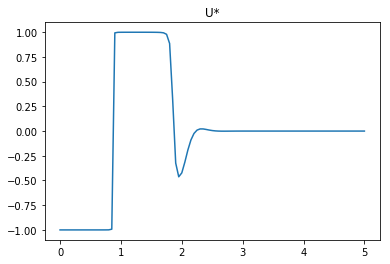

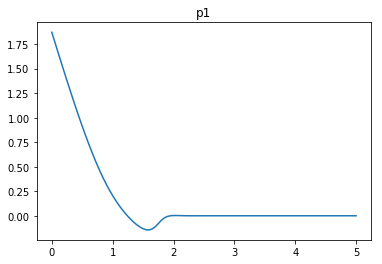

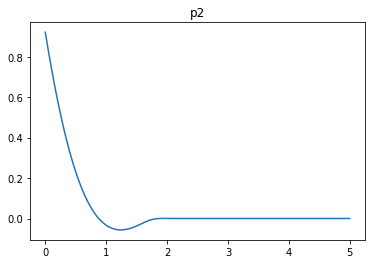

0.0005722367659350214


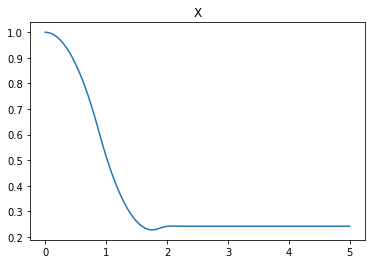

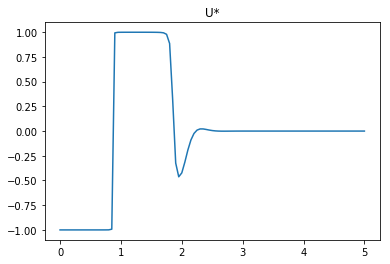

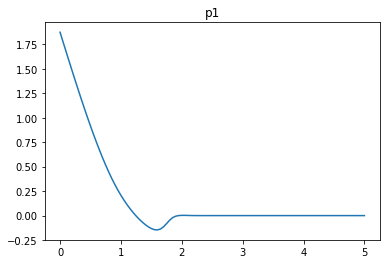

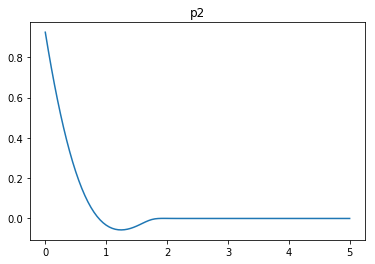

0.0004977023564332109


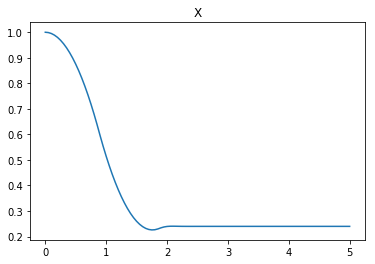

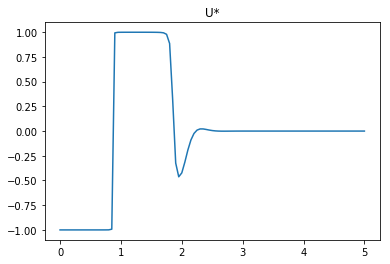

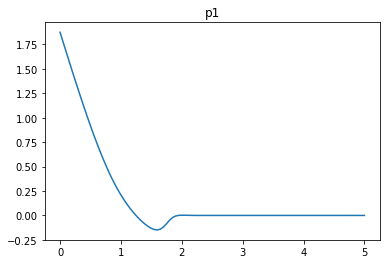

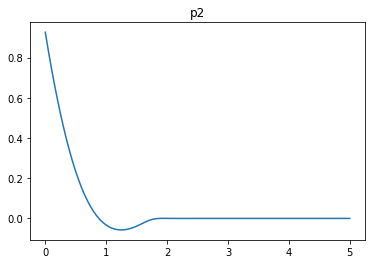

0.0004328761281083057


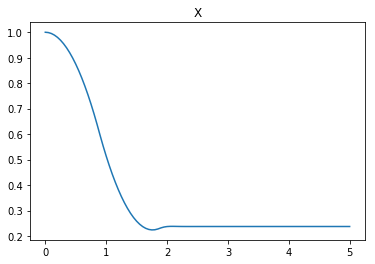

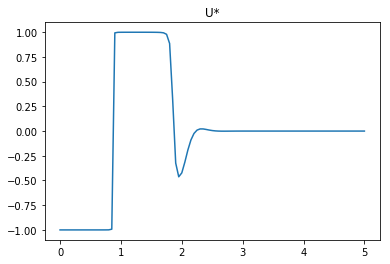

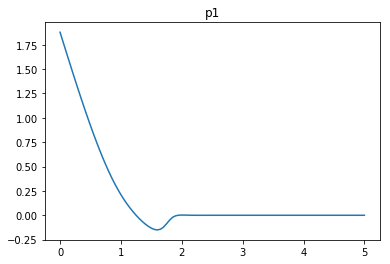

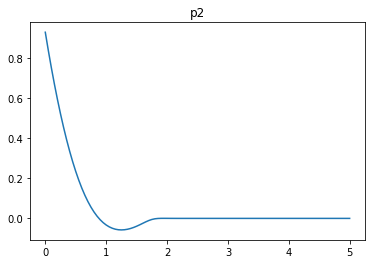

0.00037649358067924675


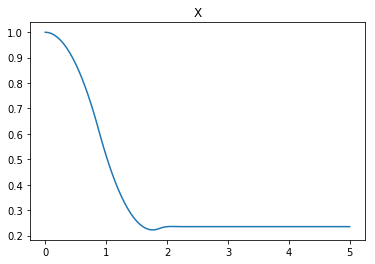

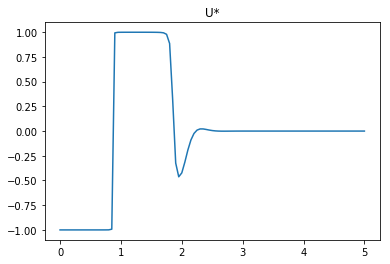

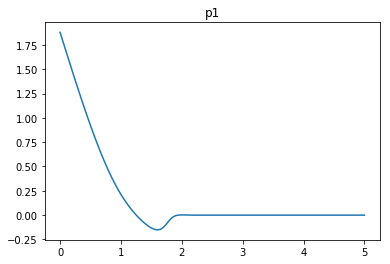

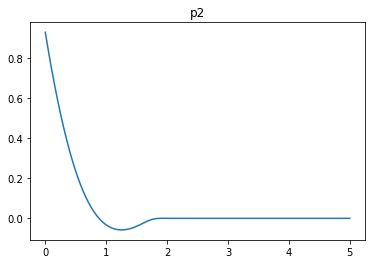

0.00032745491628777284


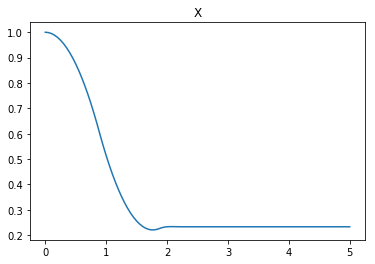

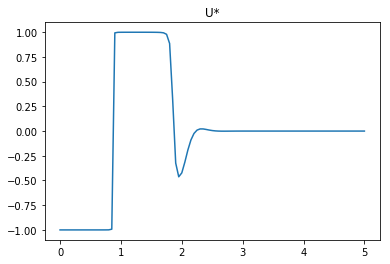

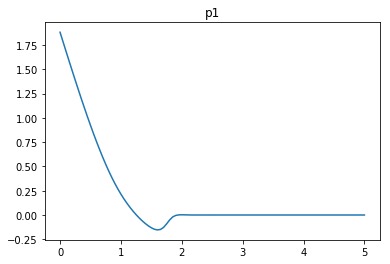

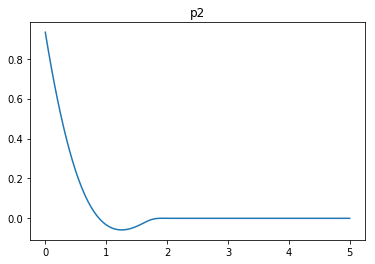

0.0002848035868435802


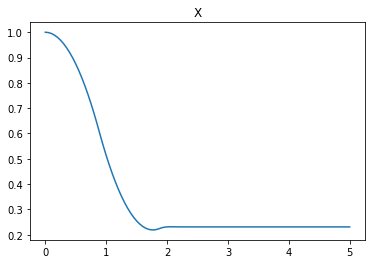

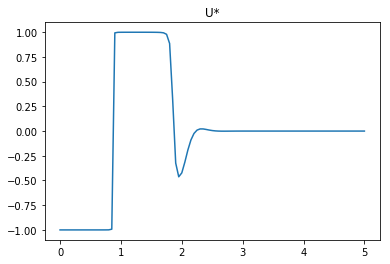

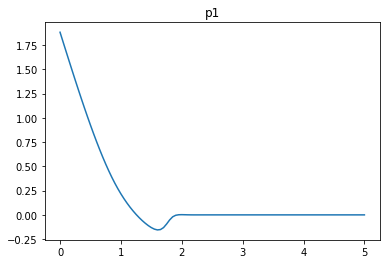

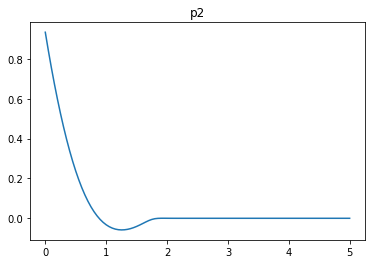

0.0002477076355991711


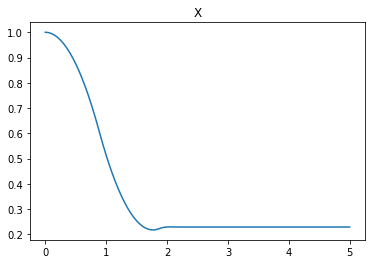

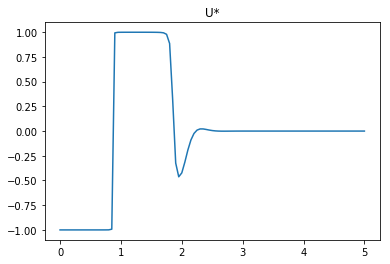

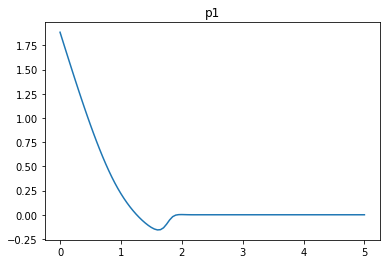

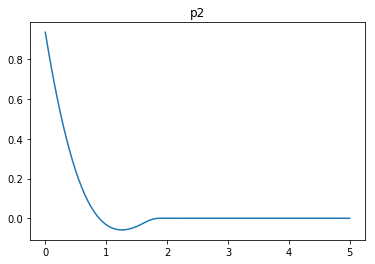

0.00021544346900318823


/home/jeremie/anaconda3/envs/ailib-dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power


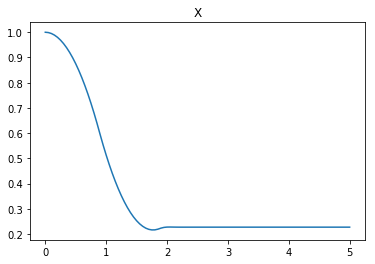

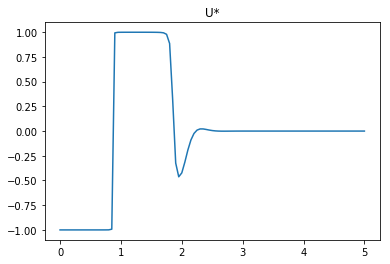

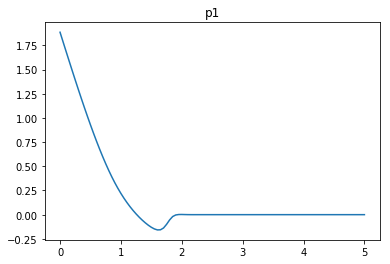

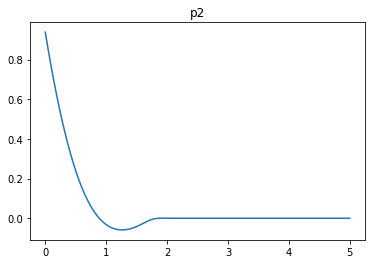

0.0001873817422860383


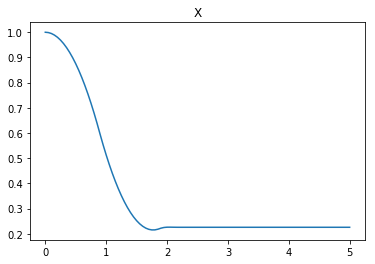

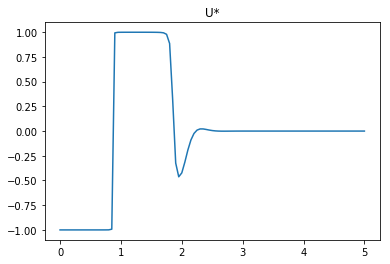

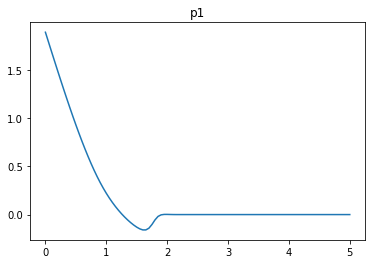

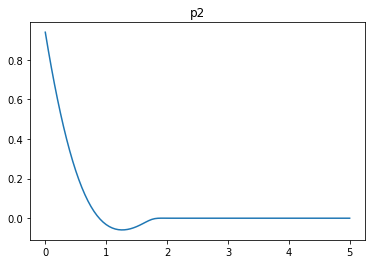

0.00016297508346206434


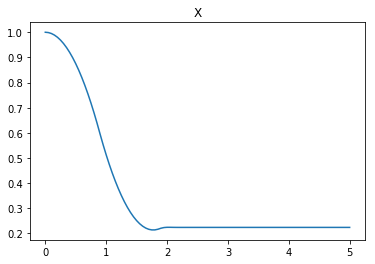

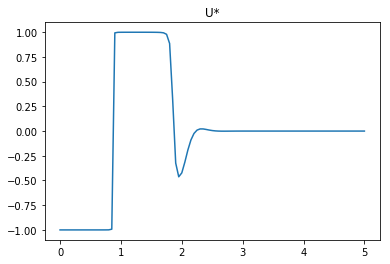

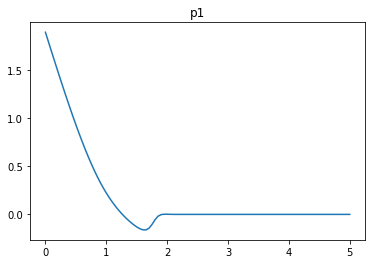

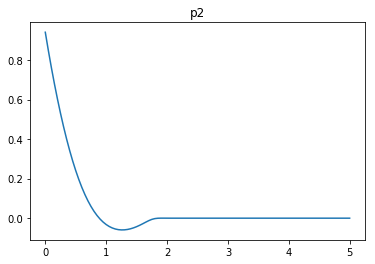

0.00014174741629268049


/home/jeremie/anaconda3/envs/ailib-dev/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/jeremie/anaconda3/envs/ailib-dev/lib/python3.7/site-packages/scipy/integrate/_bvp.py:1092: RuntimeWarning: invalid value encountered in greater
  insert_1, = np.nonzero((rms_res > tol) & (rms_res < 100 * tol))
/home/jeremie/anaconda3/envs/ailib-dev/lib/python3.7/site-packages/scipy/integrate/_bvp.py:1092: RuntimeWarning: invalid value encountered in less
  insert_1, = np.nonzero((rms_res > tol) & (rms_res < 100 * tol))
/home/jeremie/anaconda3/envs/ailib-dev/lib/python3.7/site-packages/scipy/integrate/_bvp.py:1093: RuntimeWarning: invalid value encountered in greater_equal
  insert_2, = np.nonzero(rms_res >= 100 * tol)


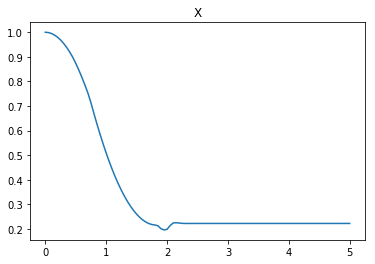

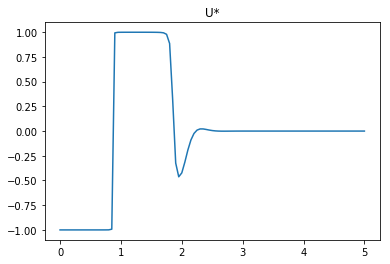

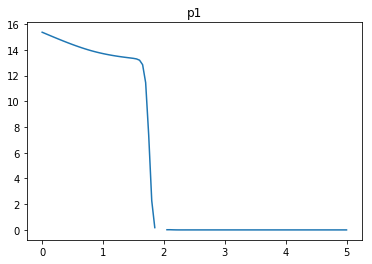

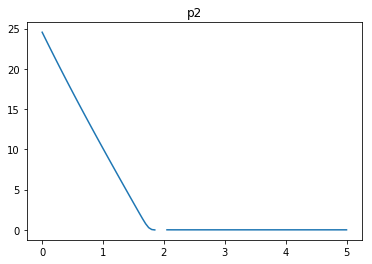

0.0001232846739442066


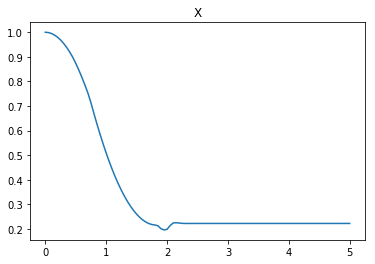

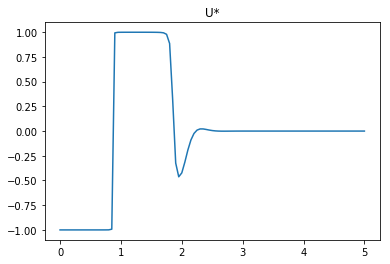

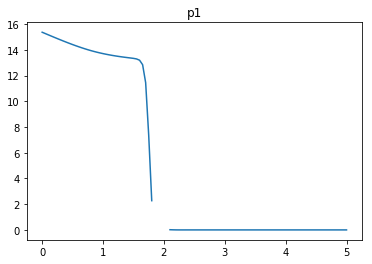

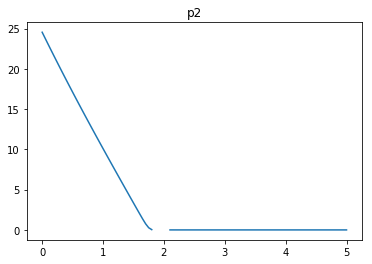

0.00010722672220103231


/home/jeremie/anaconda3/envs/ailib-dev/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


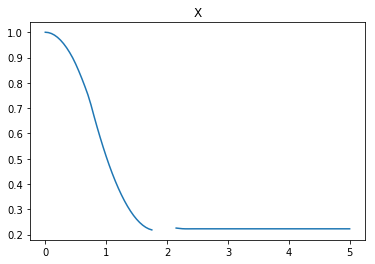

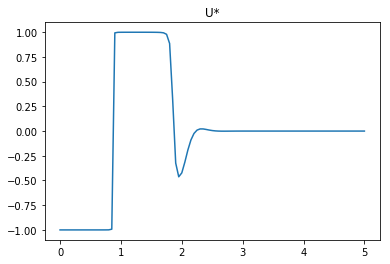

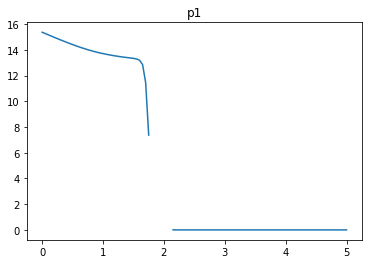

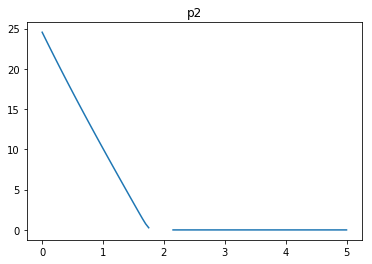

9.326033468832199e-05


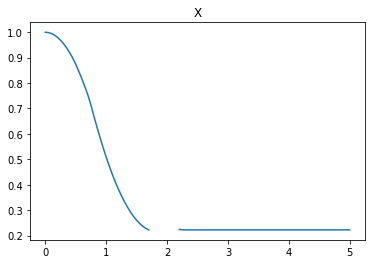

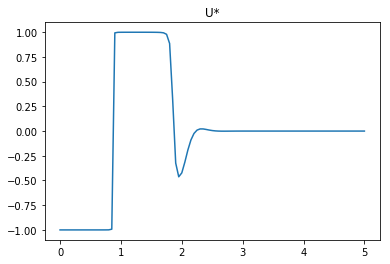

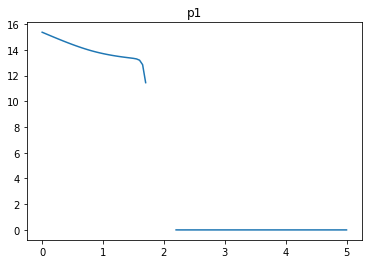

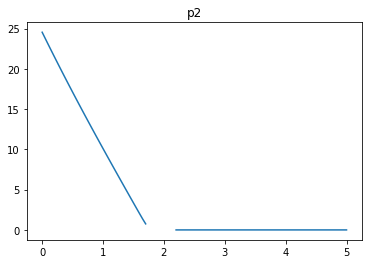

8.111308307896872e-05


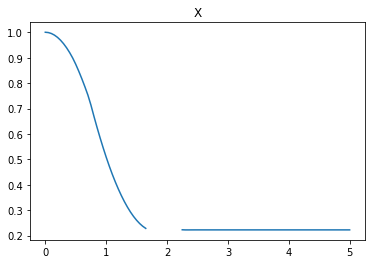

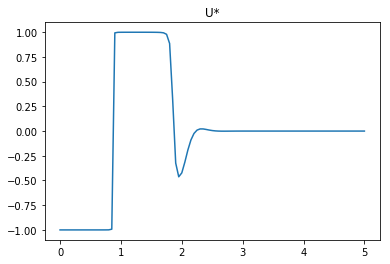

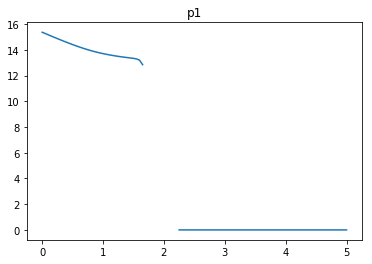

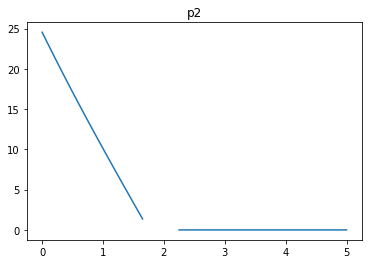

7.054802310718646e-05


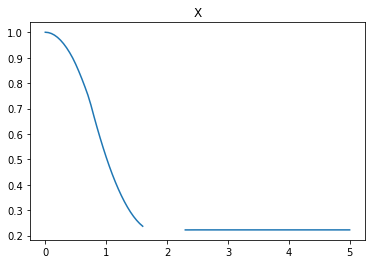

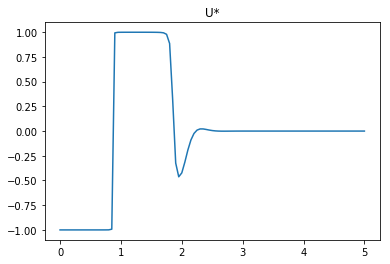

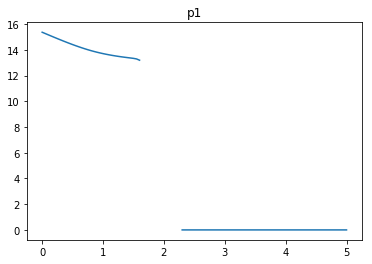

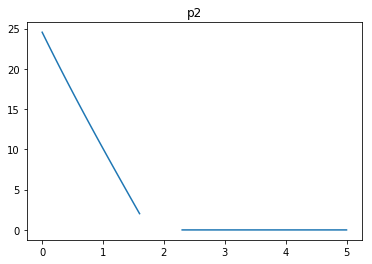

6.135907273413163e-05


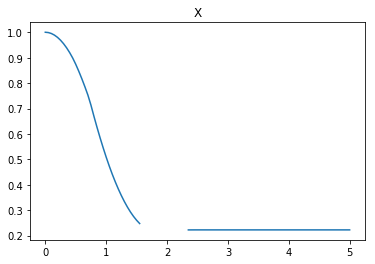

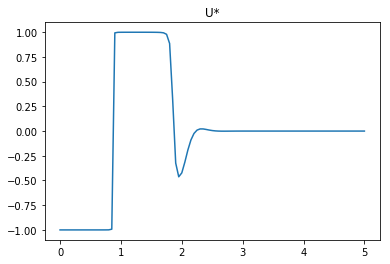

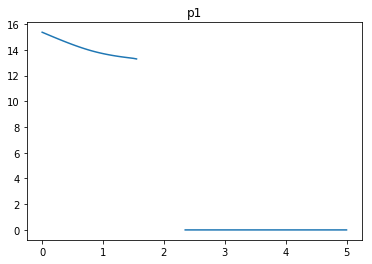

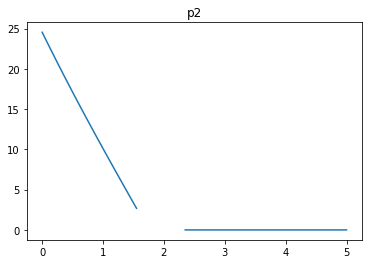

5.3366992312063015e-05


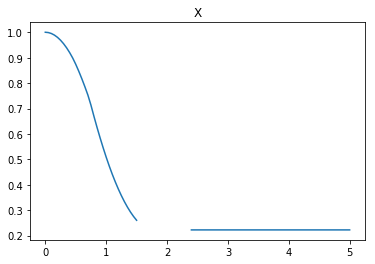

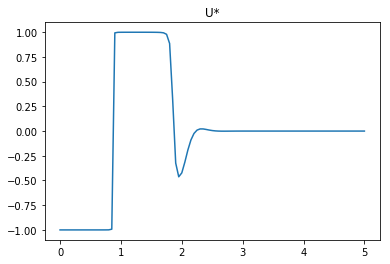

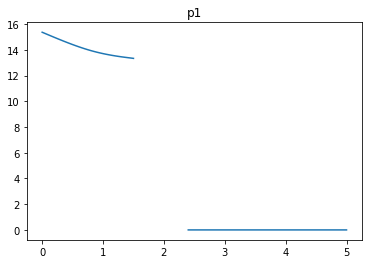

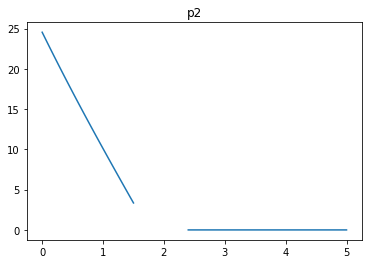

4.641588833612772e-05


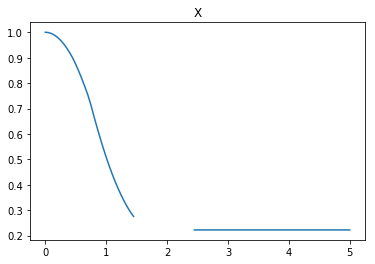

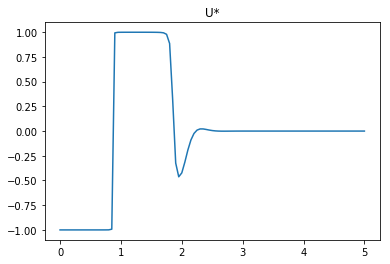

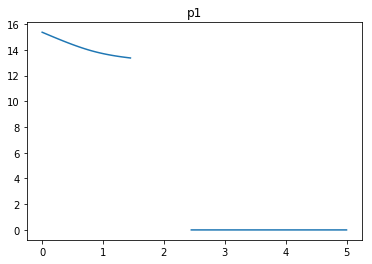

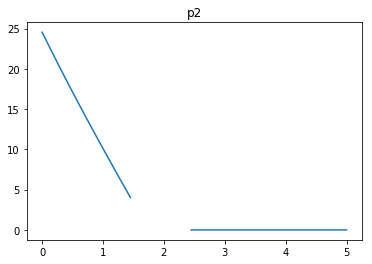

4.03701725859655e-05


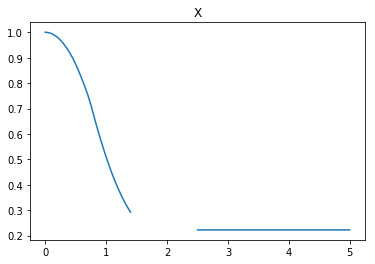

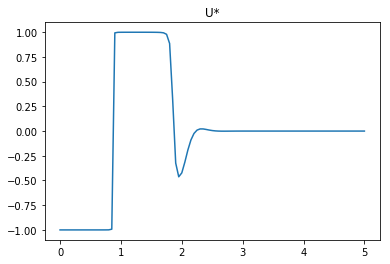

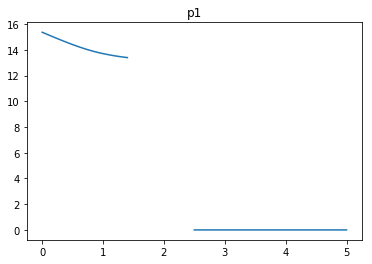

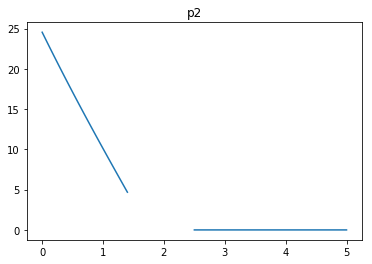

3.511191734215127e-05


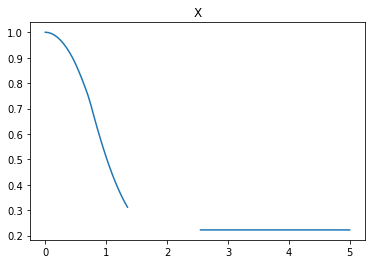

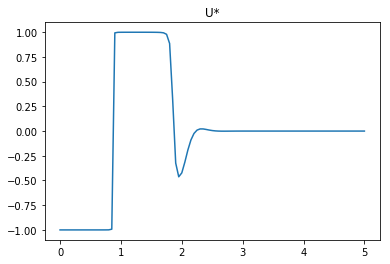

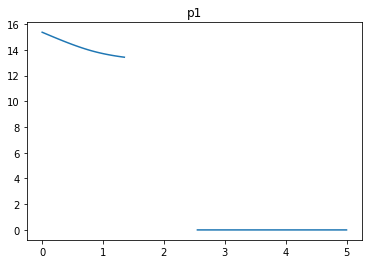

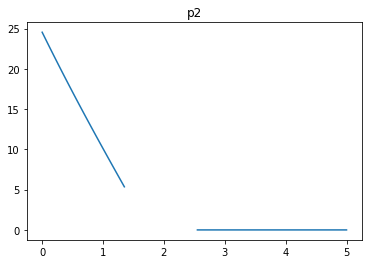

3.053855508833412e-05


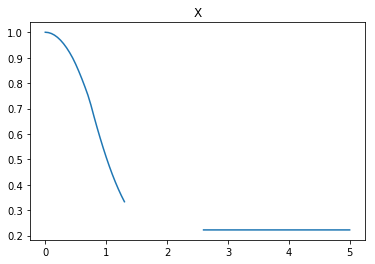

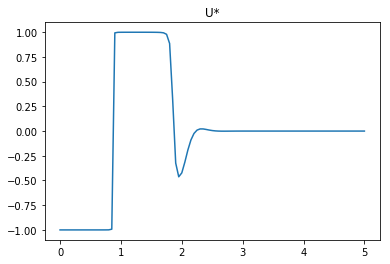

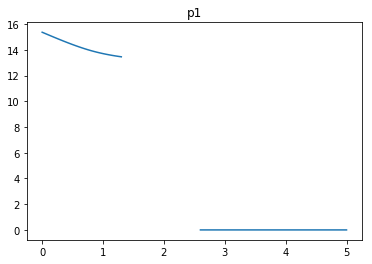

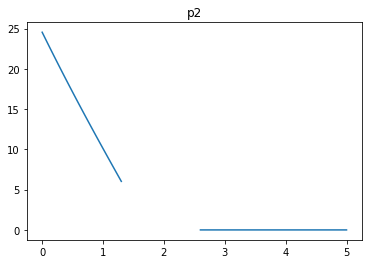

2.656087782946684e-05


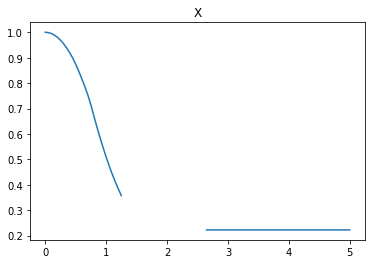

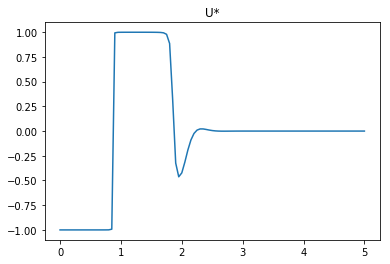

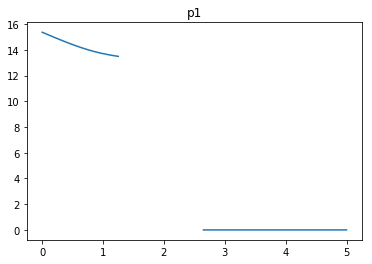

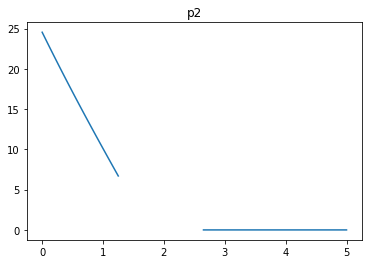

2.310129700083158e-05


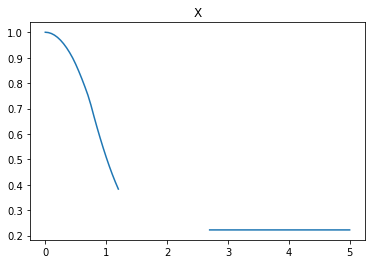

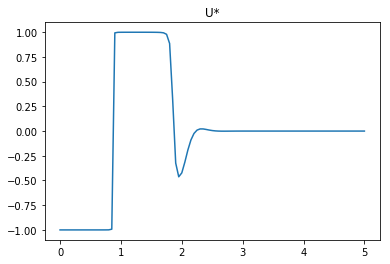

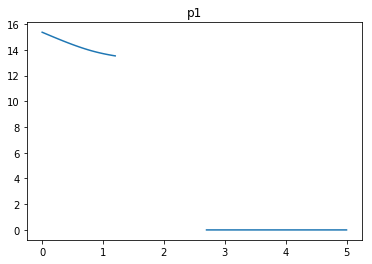

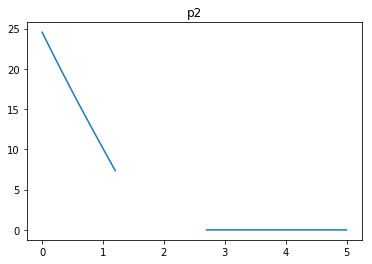

2.0092330025650458e-05


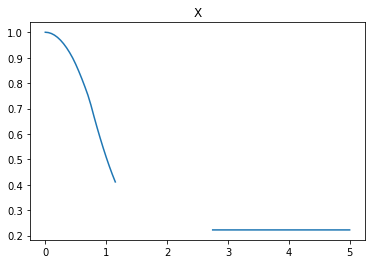

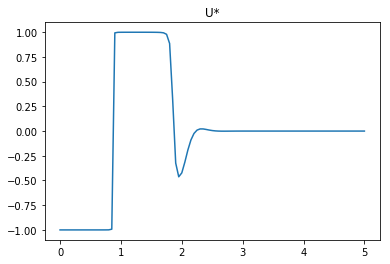

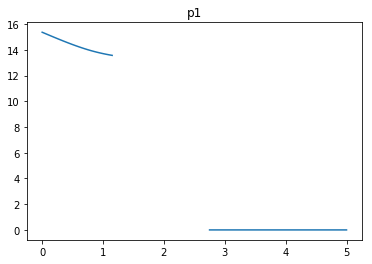

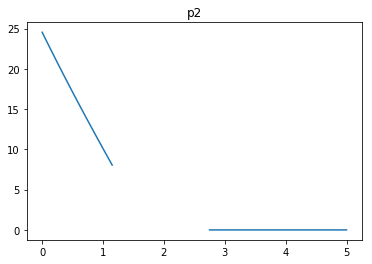

1.747528400007683e-05


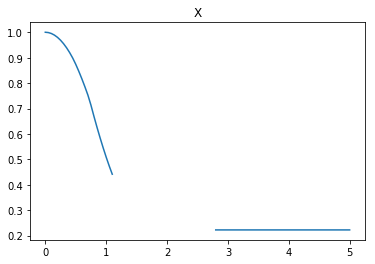

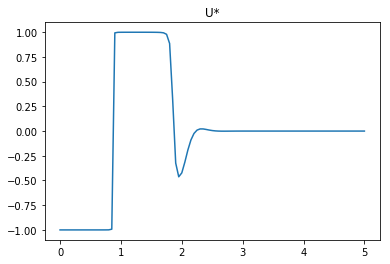

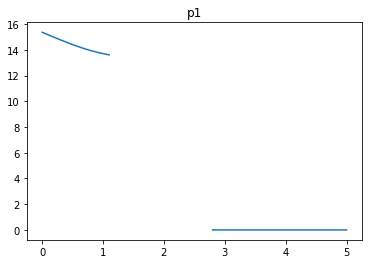

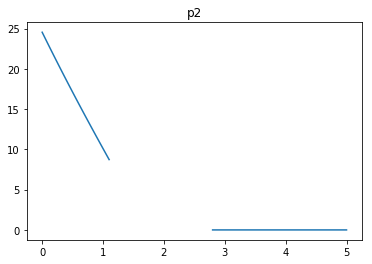

1.5199110829529332e-05


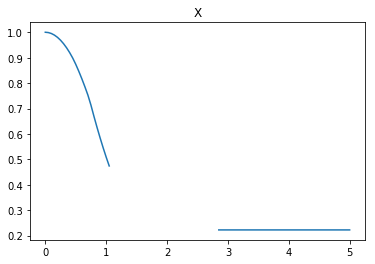

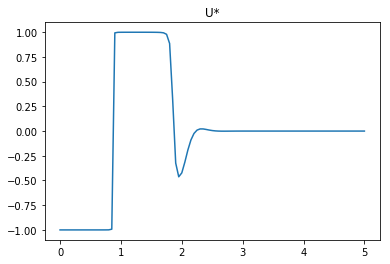

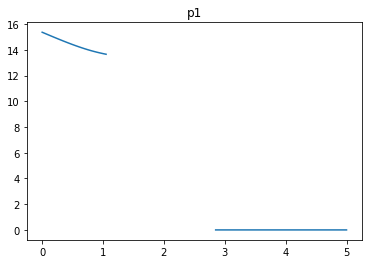

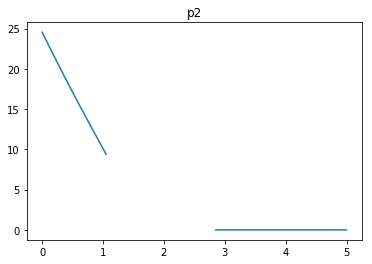

1.3219411484660286e-05


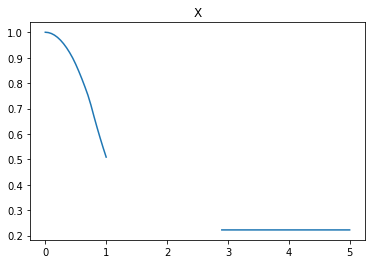

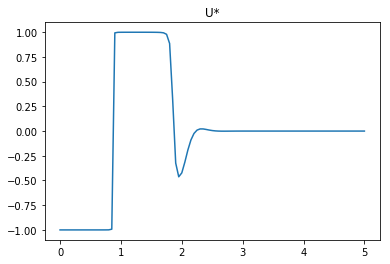

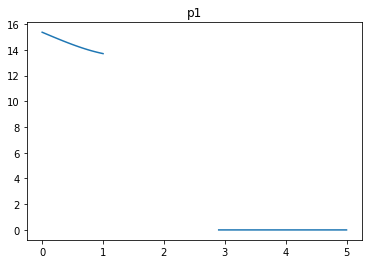

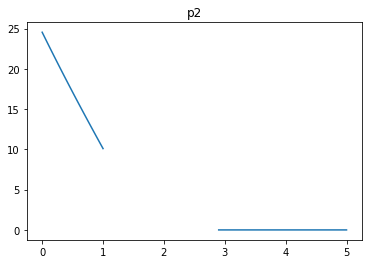

1.1497569953977357e-05


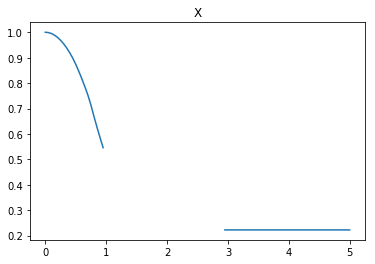

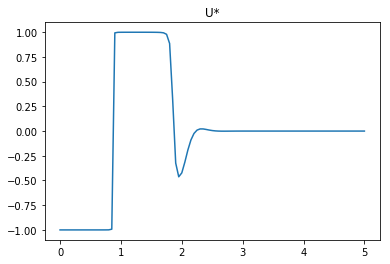

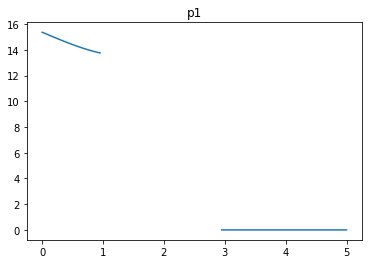

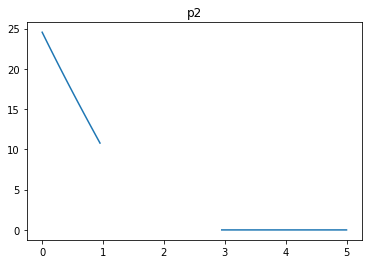

1e-05


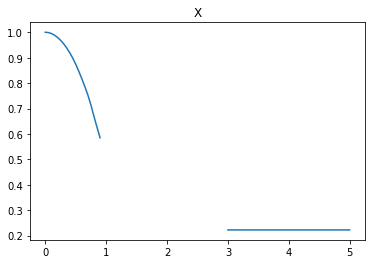

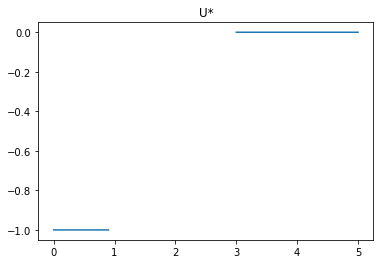

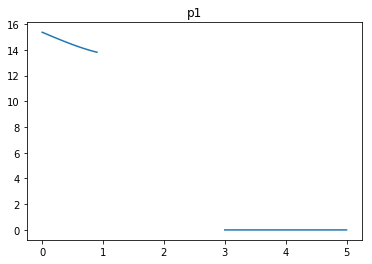

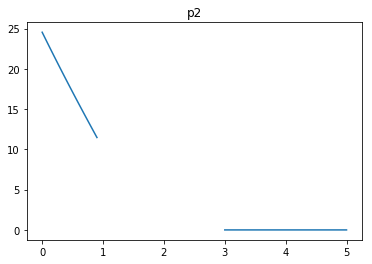

In [1]:
%matplotlib inline

# Toy problem inspired by Paul Malisani

import numpy as np, pandas as pd, scipy as sp
from scipy.linalg import *
from scipy.integrate import *
from scipy.interpolate import*
import math
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy

# Interior Penalty function

def dgamma(x,n):
    dgamma1_i = -n*x**(-n-1)
    boolX = x >= 0
    dgamma1i_matrix = boolX*dgamma1_i
    return dgamma1i_matrix

def d2gamma(x,n):
    dgamma2_i = n*(n+1)*x**(-n-2)
    boolX = x >= 0
    dgamma2i_matrix = boolX*dgamma2_i
    return dgamma2i_matrix    

#ODE equation for BVP 

def ode_bvp(t,x):
    global eps, n
    indice = int(t.shape[0])
    indice_t = t
    xiopt=-np.arcsinh(x[3]/eps)
    xiopt=xiopt.reshape([1,-1])
    uopt=np.tanh(xiopt)
    uopt=uopt.reshape([1,-1])
    dxdy=np.vstack((x[1],uopt,-2*x[0]-eps*dgamma(-0.2+x[0],ng),-x[2]))
    return dxdy

#Jacobian_Matrix    

def jac_bvp(t,x):
    global eps, ng
    dxdy=([0,1,0,0],[0,0,0,(-1/eps)*(1/math.sqrt((x[3][0]/eps)**2+1))*(1/(np.cosh(np.arcsinh(-x[3][0]/eps))**2))],[(-2-eps*d2gamma(x[0][0]-0.2,ng)),0,0,0],[0,0,-1,0])
    dxdy=np.atleast_3d(dxdy)
    l=len(t)
    for i in range (1,l):
        dxi=([0,1,0,0],[0,0,0,(-1/eps)*(1/math.sqrt((x[3][i]/eps)**2+1))*(1/(np.cosh(np.arcsinh(-x[3][i]/eps))**2))],[(-2-eps*d2gamma(x[0][i]-0.2,ng)),0,0,0],[0,0,-1,0])
        dxi=np.atleast_3d(dxi)
        dxdy=np.append(dxdy,dxi,axis=2)    
    return dxdy
    
# Boundary conditions

def twobc(ya,yb):
    res = np.array([ya[0]-1,ya[1],yb[2],yb[3]])
    return res

def yeval(inc) :
    y=np.array([1,1,0,0])
    y = y.reshape([-1,1])
    y=np.repeat(y, inc, axis=1)
    return y

def yeval2() :
    global t, x
    Yvint=scipy.interpolate.interp1d(t,x)
    Yv=Yvint(t)
    return Yv

# Solve

global eps, ng, t, x, uopt, topt
    
t = np.linspace(0,5,101)
ng = 1.1
EPS = np.logspace(-1, -5, 67)
x = yeval(101)

for i in range (0,int(EPS.shape[0])):
   eps=EPS[i]
   print(eps)
   SOL=sp.integrate.solve_bvp(ode_bvp,twobc,t,x,tol=0.0001,max_nodes=20000)

   Yvint=scipy.interpolate.interp1d(t,SOL.sol(t))
   x=Yvint(t)
   h=np.mod(-math.log(eps)/math.log(10),2)-1
        
   if np.abs(h)<=1e-3:
       uopt=np.tanh(np.arcsinh(-SOL.sol(t)[3]/eps))
       uopt=uopt.reshape([1,-1])
       topt=t

   plt.figure()
   plt.plot(t,SOL.sol(t)[0].reshape([-1,1]))
   plt.title('X')
   plt.show()   
    
   plt.figure(2)
   plt.plot(t,uopt.reshape([-1,1]))
   plt.title('U*')
   plt.show()
   plt.figure(3)
   plt.plot(t,SOL.sol(t)[2].reshape([-1,1]))
   plt.title('p1')
   plt.show()
   plt.figure(4)
   plt.plot(t,SOL.sol(t)[3].reshape([-1,1]))
   plt.title('p2')
   plt.show()

In [13]:
A = 1.5
B = 2.0

a = np.linspace(0, A, 11)
b = np.linspace(A, B, 10001)
c = np.linspace(B, 5.0, 11)

t = np.concatenate((a[:-1], b[:-1], c))

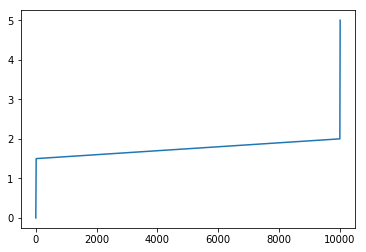

In [14]:
plt.plot(t)

In [51]:
np.logspace(0.3, 1., 10)

array([ 1.99526231,  2.44843675,  3.00453853,  3.68694506,  4.52434335,
        5.55193591,  6.81292069,  8.36030694, 10.25914365, 12.58925412])